# Group Project: Heart Attack Analysis & Prediction
### By: Halee Staggs, Vicky van der Wagt, Jesse Gutierrez

Code URL: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?resource=download 

#### Dataset Summary Breakdown

**Age** : Age of the patient

**Sex** : Sex of the patient

**exang**: exercise induced angina (1 = yes; 0 = no)

**ca**: number of major vessels (0-3)

**cp**: Chest Pain type chest pain type

**Value 1**: typical angina

**Value 2**: atypical angina

**Value 3**: non-anginal pain

**Value 4**: asymptomatic

**trtbps**: resting blood pressure (in mm Hg)

**chol**: cholestoral in mg/dl fetched via BMI sensor

**fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

**rest_ecg**: resting electrocardiographic results

**Value 0**: normal

**Value 1**: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**Value 2**: showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach**: maximum heart rate achieved

**target**: 0= less chance of heart attack 1= more chance of heart attack

In [1]:
# I installed this in the terminal: conda install -c r r-essentials, conda install -c r rpy2, pip install tzlocal, pip install --upgrade rpy2, & pip install --force-reinstall cffi
# Had to load the following command to generate R in my vs code jupyter notebook
%load_ext rpy2.ipython

In [2]:
%%R
# Loaded the dataset which was downloaded through Kaggle
data <- read.csv('/Users/jesse/Desktop/School/University of San Diego/ADS 502- Applied Data Mining/Group Project/heart.csv')
head(data)

  age sex cp trtbps chol fbs restecg thalachh exng oldpeak slp caa thall output
1  63   1  3    145  233   1       0      150    0     2.3   0   0     1      1
2  37   1  2    130  250   0       1      187    0     3.5   0   0     2      1
3  41   0  1    130  204   0       0      172    0     1.4   2   0     2      1
4  56   1  1    120  236   0       1      178    0     0.8   2   0     2      1
5  57   0  0    120  354   0       1      163    1     0.6   2   0     2      1
6  57   1  0    140  192   0       1      148    0     0.4   1   0     1      1


In [3]:
%%R
# Sought to identify the total observations & attributes of the DS
dim(data)

[1] 303  14


In [4]:
%%R
# Wanted to see if there was any null values
colSums(is.na(data))

     age      sex       cp   trtbps     chol      fbs  restecg thalachh 
       0        0        0        0        0        0        0        0 
    exng  oldpeak      slp      caa    thall   output 
       0        0        0        0        0        0 


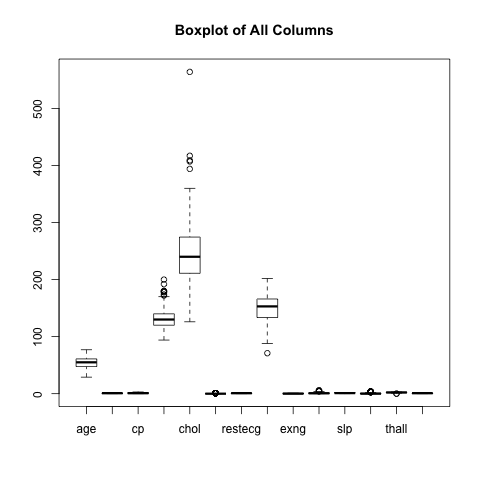

In [5]:
%%R
# Displaying the distribution of all data attributes
boxplot(data, main="Boxplot of All Columns")

In [6]:
%%R

colSums(is.na(data))


     age      sex       cp   trtbps     chol      fbs  restecg thalachh 
       0        0        0        0        0        0        0        0 
    exng  oldpeak      slp      caa    thall   output 
       0        0        0        0        0        0 


In [7]:
%%R
# Wanted to see if there were any corr. w/ output & the other attributes
cor(data, data$output)

                [,1]
age      -0.22543872
sex      -0.28093658
cp        0.43379826
trtbps   -0.14493113
chol     -0.08523911
fbs      -0.02804576
restecg   0.13722950
thalachh  0.42174093
exng     -0.43675708
oldpeak  -0.43069600
slp       0.34587708
caa      -0.39172399
thall    -0.34402927
output    1.00000000


In [83]:
%%R
# Downloaded necessary package to split dataset
library(caret)
# Split the data by 80% test & 20% train
index <- createDataPartition(data$output, p = 0.8, list = FALSE)
# Subset for training data
training_data <- data[index, ] 
# Subset for test data
test_data <- data[-index, ] 

# Print out the dimensions for training & test subsets
print(paste('Training data dimensions:', paste(dim(training_data), collapse = " x ")))
print(paste('Test data dimensions:', paste(dim(test_data), collapse = " x ")))

[1] "Training data dimensions: 243 x 14"
[1] "Test data dimensions: 60 x 14"


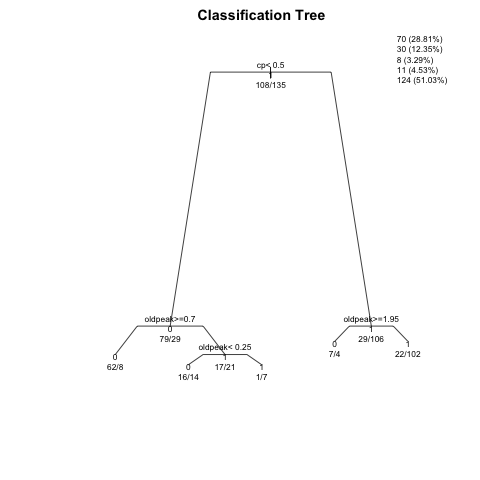

In [84]:
%%R
# Load required library
library(rpart)

# Create the formula for the decision tree based on assigned variables
formula <- output ~ thalachh + cp + exng + oldpeak

# Build decision tree model
cart_model <- rpart(formula, data = training_data, method = "class")

# Had the adjust the dimensions of decision tree as it was too crammed
par(mar=c(5,5,2,2))
plot(cart_model, main="Classification Tree", cex=0.7, margin=0.1, branch=0.6)
text(cart_model, use.n=TRUE, all=TRUE, cex=0.7)

# In these sets of codes, it added number of observations in each leaf
n_leaf <- table(cart_model$where)
n_leaf_pct <- paste0(sprintf("%.2f", prop.table(n_leaf)*100), "%")
n_leaf_text <- paste0(n_leaf, " (", n_leaf_pct, ")")
legend("topright", legend=n_leaf_text, bty="n", cex=0.7)

# Predict on test data
y_pred <- predict(cart_model, training_data, type = "class")

In [85]:
%%R
# Applied model on test data
predict_data <- predict(cart_model, test_data, type = 'class')

# Created a table to determine the accuracy of the model
output <- table(test_data$output, predict_data)
output

   predict_data
     0  1
  0 26  4
  1 10 20


In [86]:
%%R
# Calculate the accuracy of the created model
accuracy <- round((sum(diag(output)) / sum(output)) * 100, 4)
print(paste('The accuracy of the model is:', paste(accuracy), paste('%'), collapse = ' x '))

[1] "The accuracy of the model is: 76.6667 %"


Accuracy of test 32338 :  93.3333 %
Accuracy of test 33273 :  93.3333 %
Accuracy of test 26298 :  91.6667 %
Test 32338 33273 accuracy: 93.3333 %
Test 32338 33273 accuracy: 93.3333 %
Test 26298 29603 90019 91152 95209 96376 97650 accuracy: 91.6667 %


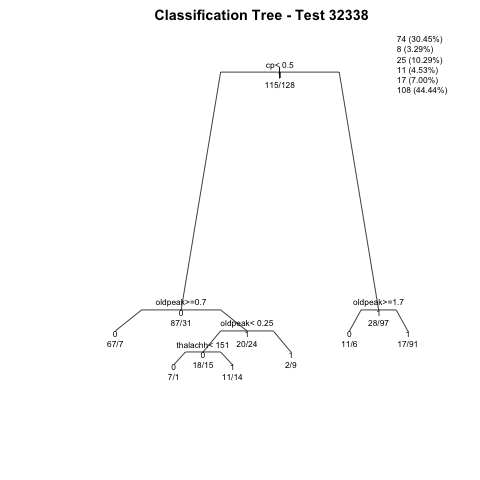

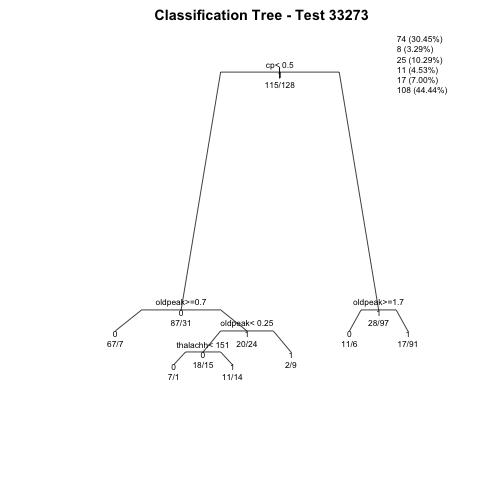

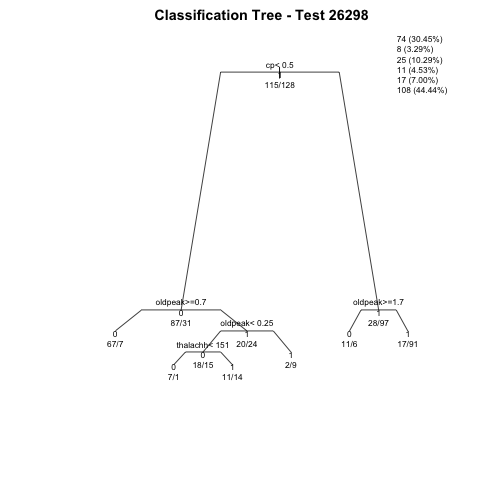

In [82]:
%%R

# Load required library
library(rpart)

# Create the formula for the decision tree based on assigned variables
formula <- output ~ thalachh + cp + exng + oldpeak

accuracy_list <- numeric(100000)
for (i in 1:100000) {
  # Split the data by 80% test & 20% train
  index <- createDataPartition(data$output, p = 0.8, list = FALSE)
  # Subset for training data
  training_data <- data[index, ] 
  # Subset for test data
  test_data <- data[-index, ] 

  # Build decision tree model
  cart_model <- rpart(formula, data = training_data, method = "class")

  # Predict on test data
  y_pred <- predict(cart_model, test_data, type = "class")
  # Calculate accuracy
  output <- table(test_data$output, y_pred)
  accuracy <- round((sum(diag(output)) / sum(output)) * 100, 4)
  accuracy_list[i] <- accuracy
}

# Display top 3 classification trees with the highest accuracy
if (any(accuracy_list > 90)) {
  top_3_indices <- order(accuracy_list, decreasing = TRUE)[1:3]
  for (i in top_3_indices) {
    cat("Accuracy of test", i, ": ", accuracy_list[i], "%\n")
    # Had the adjust the dimensions of decision tree as it was too crammed
    par(mar=c(5,5,2,2))
    plot(cart_model, main=paste0("Classification Tree - Test ", i), cex=0.7, margin=0.1, branch=0.6)
    text(cart_model, use.n=TRUE, all=TRUE, cex=0.7)
    n_leaf <- table(cart_model$where)
    n_leaf_pct <- paste0(sprintf("%.2f", prop.table(n_leaf)*100), "%")
    n_leaf_text <- paste0(n_leaf, " (", n_leaf_pct, ")")
    legend("topright", legend=n_leaf_text, bty="n", cex=0.7)
  }
  
  avg_accuracy <- mean(accuracy_list)
  if (avg_accuracy > 90) {
    cat("Average accuracy: ", avg_accuracy, "%\n")
  }
}

# Print accuracy of each test and average accuracy if accuracy is greater than 90%
if (any(accuracy_list > 90)) {
  # Sort the accuracy list in descending order and get the top 3 values
  top_3 <- sort(accuracy_list, decreasing = TRUE)[1:3]
  
  # Loop through the top 3 values and print the corresponding test accuracy
  for (i in 1:length(top_3)) {
    index <- which(accuracy_list == top_3[i])
    cat("Test", index, "accuracy:", top_3[i], "%\n")
  }
  
  avg_accuracy <- mean(accuracy_list)
  if (avg_accuracy > 90) {
    cat("Average accuracy: ", avg_accuracy, "%\n")
  }
}

# Tried Recalculating the Classification Model w/o Outliers

In [44]:
%%R
# Calculated Q1, Q3, & IQR to determine outliers
Q1 <- quantile(data$age, .25)
Q3 <- quantile(data$age, .75)
IQR <- IQR(data$age)

# Removed outliers exceeding 1.5*IQR of Q1 and Q3
no_outliers <- subset(data, data$age> (Q1 - 1.5*IQR) & data$age< (Q3 + 1.5*IQR))

# Calculated Q1, Q3, & IQR to determine outliers
Q1 <- quantile(no_outliers$trtbps, .25)
Q3 <- quantile(no_outliers$trtbps, .75)
IQR <- IQR(no_outliers$trtbps)

# Removed outliers exceeding 1.5*IQR of Q1 and Q3
no_outliers <- subset(no_outliers, no_outliers$trtbps> (Q1 - 1.5*IQR) & no_outliers$trtbps< (Q3 + 1.5*IQR))

# Calculated Q1, Q3, & IQR to determine outliers
Q1 <- quantile(no_outliers$chol, .25)
Q3 <- quantile(no_outliers$chol, .75)
IQR <- IQR(no_outliers$chol)

# Removed outliers exceeding 1.5*IQR of Q1 and Q3
no_outliers <- subset(no_outliers, no_outliers$chol> (Q1 - 1.5*IQR) & no_outliers$chol< (Q3 + 1.5*IQR))

# Calculated Q1, Q3, & IQR to determine outliers
Q1 <- quantile(no_outliers$thalachh, .25)
Q3 <- quantile(no_outliers$thalachh, .75)
IQR <- IQR(no_outliers$thalachh)

# Removed outliers exceeding 1.5*IQR of Q1 and Q3
no_outliers <- subset(no_outliers, no_outliers$thalachh> (Q1 - 1.5*IQR) & no_outliers$thalachh< (Q3 + 1.5*IQR))

# Display the dimension of the updated dataset
dim(no_outliers) 

[1] 284  14


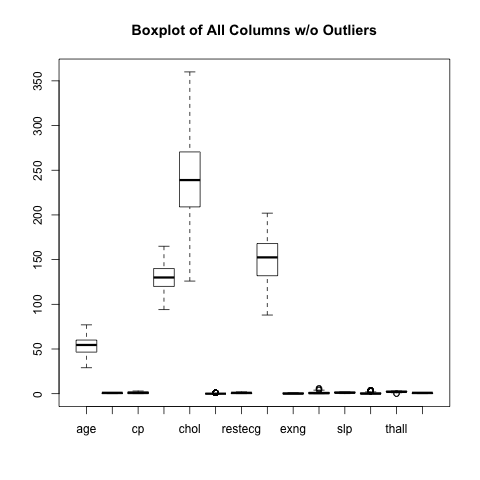

In [45]:
%%R
# Verify that there are indeed no outliers
boxplot(no_outliers, main="Boxplot of All Columns w/o Outliers")

In [46]:
%%R
# Wanted to see if there were any corr. w/ output & the other attributes after removing outliers
cor(no_outliers, no_outliers$output)

                [,1]
age      -0.22828326
sex      -0.32053481
cp        0.43140523
trtbps   -0.10384451
chol     -0.10066589
fbs      -0.01435609
restecg   0.14850634
thalachh  0.43350372
exng     -0.42759376
oldpeak  -0.44150585
slp       0.34033678
caa      -0.39265123
thall    -0.35795376
output    1.00000000


In [87]:
%%R
# Downloaded necessary package to split dataset
library(caret)
# Split the data by 80% test & 20% train
index <- createDataPartition(no_outliers$output, p = 0.8, list = FALSE)
# Subset for training data
training_data <- no_outliers[index, ] 
# Subset for test data
test_data <- no_outliers[-index, ] 

# Print out the dimensions for training & test subsets
print(paste('Training data dimensions:', paste(dim(training_data), collapse = " x ")))
print(paste('Test data dimensions:', paste(dim(test_data), collapse = " x ")))

[1] "Training data dimensions: 228 x 14"
[1] "Test data dimensions: 56 x 14"


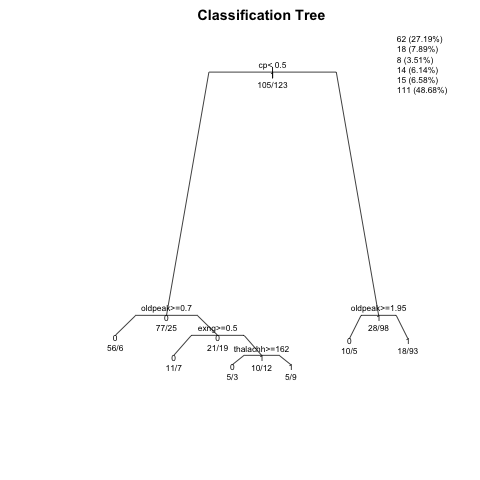

In [88]:
%%R
# Load required library
library(rpart)

# Create the formula for the decision tree based on assigned variables
formula <- output ~ thalachh + cp + exng + oldpeak

# Build decision tree model
cart_model <- rpart(formula, data = training_data, method = "class")

# Had the adjust the dimensions of decision tree as it was too crammed
par(mar=c(5,5,2,2))
plot(cart_model, main="Classification Tree", cex=0.7, margin=0.1, branch=0.6)
text(cart_model, use.n=TRUE, all=TRUE, cex=0.7)

# In these sets of codes, it added number of observations in each leaf
n_leaf <- table(cart_model$where)
n_leaf_pct <- paste0(sprintf("%.2f", prop.table(n_leaf)*100), "%")
n_leaf_text <- paste0(n_leaf, " (", n_leaf_pct, ")")
legend("topright", legend=n_leaf_text, bty="n", cex=0.7)

# Predict on test data
y_pred <- predict(cart_model, training_data, type = "class")

In [89]:
%%R
# Applied model on test data
predict_data <- predict(cart_model, test_data, type = 'class')

# Created a table to determine the accuracy of the model
output <- table(test_data$output, predict_data)
output

   predict_data
     0  1
  0 17  4
  1  7 28


In [90]:
%%R
# Calculate the accuracy of the created model
accuracy <- round((sum(diag(output)) / sum(output)) * 100, 4)
print(paste('The accuracy of the model is:', paste(accuracy), paste('%'), collapse = ' x '))

[1] "The accuracy of the model is: 80.3571 %"


### I noticed that the accuracy of the model is dependent on the random split among the training & test data
### I used the help of some online resources to conduct a loop fx to confirm this assumption
### I will try to find ways to adjust the accuracy of the model

Accuracy of test 12631 :  94.6429 %
Accuracy of test 1223 :  92.8571 %
Accuracy of test 1750 :  92.8571 %
Test 12631 accuracy: 94.6429 %
Test 1223 1750 9716 64990 73787 78421 accuracy: 92.8571 %
Test 1223 1750 9716 64990 73787 78421 accuracy: 92.8571 %


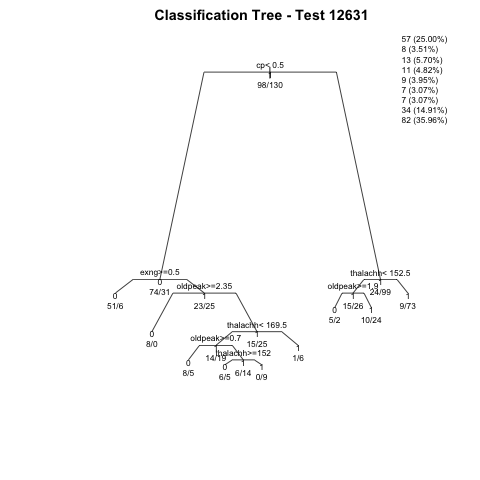

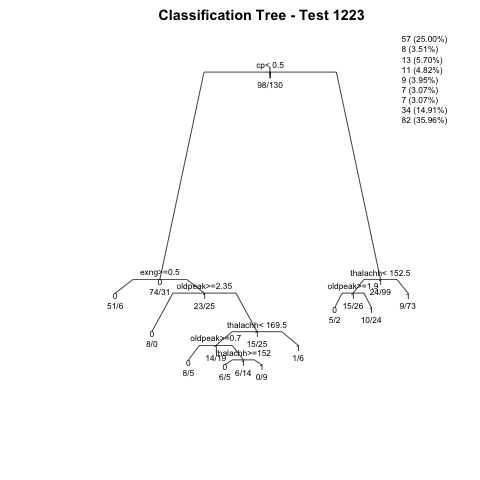

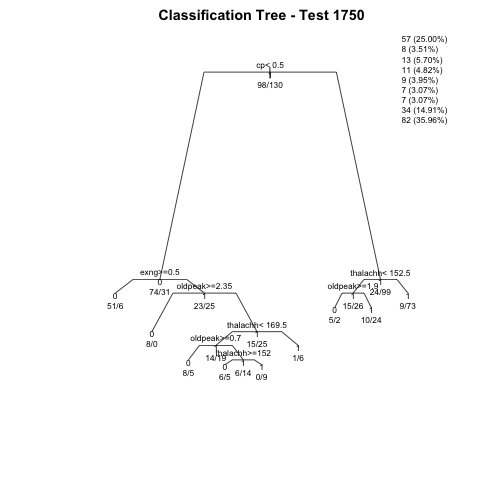

In [81]:
%%R

# Load required library
library(rpart)

# Create the formula for the decision tree based on assigned variables
formula <- output ~ thalachh + cp + exng + oldpeak

accuracy_list <- numeric(100000)
for (i in 1:100000) {
  # Split the data by 80% test & 20% train
  index <- createDataPartition(no_outliers$output, p = 0.8, list = FALSE)
  # Subset for training data
  training_data <- no_outliers[index, ] 
  # Subset for test data
  test_data <- no_outliers[-index, ] 

  # Build decision tree model
  cart_model <- rpart(formula, data = training_data, method = "class")

  # Predict on test data
  y_pred <- predict(cart_model, test_data, type = "class")
  # Calculate accuracy
  output <- table(test_data$output, y_pred)
  accuracy <- round((sum(diag(output)) / sum(output)) * 100, 4)
  accuracy_list[i] <- accuracy
}

# Display top 3 classification trees with the highest accuracy
if (any(accuracy_list > 90)) {
  top_3_indices <- order(accuracy_list, decreasing = TRUE)[1:3]
  for (i in top_3_indices) {
    cat("Accuracy of test", i, ": ", accuracy_list[i], "%\n")
    # Had the adjust the dimensions of decision tree as it was too crammed
    par(mar=c(5,5,2,2))
    plot(cart_model, main=paste0("Classification Tree - Test ", i), cex=0.7, margin=0.1, branch=0.6)
    text(cart_model, use.n=TRUE, all=TRUE, cex=0.7)
    n_leaf <- table(cart_model$where)
    n_leaf_pct <- paste0(sprintf("%.2f", prop.table(n_leaf)*100), "%")
    n_leaf_text <- paste0(n_leaf, " (", n_leaf_pct, ")")
    legend("topright", legend=n_leaf_text, bty="n", cex=0.7)
  }
  
  avg_accuracy <- mean(accuracy_list)
  if (avg_accuracy > 90) {
    cat("Average accuracy: ", avg_accuracy, "%\n")
  }
}

# Print accuracy of each test and average accuracy if accuracy is greater than 90%
if (any(accuracy_list > 90)) {
  # Sort the accuracy list in descending order and get the top 3 values
  top_3 <- sort(accuracy_list, decreasing = TRUE)[1:3]
  
  # Loop through the top 3 values and print the corresponding test accuracy
  for (i in 1:length(top_3)) {
    index <- which(accuracy_list == top_3[i])
    cat("Test", index, "accuracy:", top_3[i], "%\n")
  }
  
  avg_accuracy <- mean(accuracy_list)
  if (avg_accuracy > 90) {
    cat("Average accuracy: ", avg_accuracy, "%\n")
  }
}

### Training to verify the accuracy of a model by double testing the data through a 70/20/10 split
#### Referred to data holdout method in model evalutaion presentation during module 2
#### The below data is a 3-fold cross validation method

In [108]:
%%R
# Split the data by 70% test & 30% train
index <- createDataPartition(no_outliers$output, p = 0.7, list = FALSE)
# Subset for training data
training_data <- no_outliers[index, ] 
# Subset for test data
test_data <- no_outliers[-index, ] 

# Split the data by 70% test & 30% train
index <- createDataPartition(test_data$output, p = 0.7, list = FALSE)
# Subset for training data
test_data1 <- test_data[index, ] 
# Subset for test data
test_data2 <- test_data[-index, ] 

cat("Dimensions of original dataset w/o outliers: ", dim(no_outliers), "\n")
cat("Dimensions of training dataset: ", dim(training_data), "\n")
cat("Percentage of training dataset: ", round((nrow(training_data)/nrow(no_outliers)) * 100, 2), "%", "\n")
cat("Dimensions of test1 dataset: ", dim(test_data1), "\n")
cat("Percentage of test1 dataset: ", round((nrow(test_data1)/nrow(no_outliers)) * 100, 2), "%", "\n")
cat("Dimensions of test2 dataset: ", dim(test_data2), "\n")
cat("Percentage of test2 dataset: ", round((nrow(test_data2)/nrow(no_outliers)) * 100, 2), "%", "\n")

Dimensions of original dataset w/o outliers:  284 14 
Dimensions of training dataset:  199 14 
Percentage of training dataset:  70.07 % 
Dimensions of test1 dataset:  60 14 
Percentage of test1 dataset:  21.13 % 
Dimensions of test2 dataset:  25 14 
Percentage of test2 dataset:  8.8 % 


In [95]:
%%R

# Replicate highest accuracy percentage decision tree model and test amount the accuracy of all 3 datasets

# Create a data frame with the predictor variables and the outcome variable
df <- data.frame(x1 = c(1, 2, 3, 4, 5),
                 x2 = c("A", "B", "B", "A", "A"),
                 x3 = c(TRUE, FALSE, TRUE, FALSE, TRUE),
                 y = c("No", "Yes", "Yes", "No", "Yes"))

# Define the structure of the tree
tree_structure <- list(right = list(right = "No", left = "Yes", variable = "x1", split = 3.5),
                       left = list(variable = "x2", categories = list(B = list(right = "Yes", left = "No"),
                                                                       A = list(right = "Yes", left = "Yes"))))

# Build the decision tree using the defined structure
tree_model <- rpart(y ~ x1 + x2 + x3, data = df, parms = list(split = "information"), control = rpart.control(minsplit = 1), cp = 0, model = list(tree = tree_structure))


[1] 284
